# 학습내용

[1] 심층신경망 개요

[2] 오차역전파

[3] 기울기 소실 (Vanishing Gradient)

[4] 심층신경망 구현 (회귀분석)

  - Adam
  - 과적합 방지
  - 훈련데이터와 테스트데이터로 분리하여 학습

# 파이토치 층의 종류
- Linear layers
  - nn.Linear
 - nn.Bilinear
- Convolution layers
  - nn.Conv1d, nn.Conv2d, nn.Conv3d
  - nn.ConvTranspose1d, nn.ConvTranspose2d, nn.ConvTranspose3d
  - nn.Unfold, nn.Fold
- Pooling layers
  - nn.MaxPool1d, nn.MaxPool2d, nn.MaxPool3d
  - nn.MaxUnpool1d, nn.MaxUnpool2d, nn.MaxUnpool3d
  - nn.AvgPool1d, nn.AvgPool2d, nn.AvgPool3d
  - nn.FractionalMaxPool2d
  - nn.LPPool1d, nn.LPPool2d
  - nn.AdaptiveMaxPool1d, nn.AdaptiveMaxPool2d, nn.AdaptiveMaxPool3d
  - nn.AdaptiveAvgPool1d, nn.AdaptiveAvgPool2d, nn.AdaptiveAvgPool3d
- Padding layers
  - nn.ReflectionPad1d, nn.ReflectionPad2d
  - nn.ReplicationPad1d, nn.ReplicationPad2d, nn.ReplicationPad3d
  - nn.ZeroPad2d
  - nn.ConstantPad1d, nn.ConstantPad2d, nn.ConstantPad3d
- Normalization layers
  - nn.BatchNorm1d, nn.BatchNorm2d, nn.BatchNorm3d
  - nn.GroupNorm
  - nn.InstanceNorm1d, nn.InstanceNorm2d, nn.InstanceNorm3d
  - nn.LayerNorm
 - nn.LocalResponseNorm
- Recurrent layers
  - nn.RNN, nn.RNNCell
  - nn.LSTM, nn.LSTMCell
  - nn.GRU, nn.GRUCell
- Dropout layers
  - nn.Dropout, nn.Dropout2d, nn.Dropout3d
  - nn.AlphaDropout
- Sparse layers
  - nn.Embedding
  - nn.EmbeddingBag

# pytorch 활성화 함수 종류
 - Non-linear activations
   - nn.ELU, nn.SELU
   - nn.Hardshrink, nn.Hardtanh
  - nn.LeakyReLU, nn.PReLU, nn.ReLU, nn.ReLU6, nn.RReLU
  - nn.Sigmoid, nn.LogSigmoid
  - nn.Softplus, nn.Softshrink, nn.Softsign
  - nn.Tanh, nn.Tanhshrink
  - nn.Threshold
- Non-linear activations (other)
  - nn.Softmin
  - nn.Softmax, nn.Softmax2d, nn.LogSoftmax
  - nn.AdaptiveLogSoftmaxWithLoss

# [1] 심층신경망 개요
- 실제는 선형 데이터보다 비선형 데이터(이미지, 텍스트, 음성 등)가 더 많음
- 주가 데이터와 같은 비선형 데이터는 선형 모델로는 해결할 수 없음
- 또한, 이미지, 텍스트, 음성 등의 데이터는 고차원 공간에 분포하고 있어 데이터의 분포조차 확인하는 것이 어려움
- 비선형 문제를 해결하기 위해서는 여러층의 선형회귀 계층(<font color=red>심층신경망 (Deep Neural Network</font>)을 사용하여야 함

<center>  
<img src="https://arome1004.cafe24.com/images/pytorch/lecture_image/05_nonlinear_data.png" width=40%>   
</center>  


- 심층 신경망은 n개의 계층으로 구성
- 입력층(Input Layer), 은닉층(Hidden Layer), 출력층(Ouput Layer)으로 구성
- 각 계층마다 가중치 파라미터 (W(w1, w2, ... wn), b)가 있음
  - 계층이 증가하면 업데이트할 파라미터가 증가 → 복잡성 증가
- 각 계층마다 활성화 함수를 포함
- 심층 신경망 학습과정은 단일 신경망과 동일 (차이점은 Hidden Layer가 여러 겹 쌓여 있다는 것)

<center>  
<img src="https://arome1004.cafe24.com/images/pytorch/lecture_image/05_dnn3.png" width=60%>   
</center>  

#[2] 오차 역전파

- 역전파 (Backpropagation) : 에러를 출력층에서 입력층 쪽으로 전파시키면서 최적의 파라미터를 찾아가는 것 → 학습

- 체인 룰 (Chain Role)
  - 다음 층의 미분값이 이전 층의 미분값에 곱해짐
  - 입력 층으로 갈수록 이후 층들에 대한 미분값이 전달되면서 곱해짐

<center>  
<img src="https://arome1004.cafe24.com/images/pytorch/lecture_image/05_chain_role.png" width=30%>   
</center>

> 붉은 화살표가 “뒤에서 앞으로” 어떻게 미분값이 전달되는지 보여줌
> - 층(layer)을 거슬러 올라갈수록, 그동안 만난 모든 미분값을 연속으로 곱하며 입력까지 전달

> **1) $L\to z$**
> * 손실 $L$을 $z$로 미분한 값이 $$ \frac{\partial L}{\partial z} $$ 로 전파됨

> **2) $z\to t$**
> * 위에서 받은 $\frac{\partial L}{\partial z}$에, $z$가 $t$에 어떻게 의존하는지 $\frac{\partial z}{\partial t}$를 곱해서 $$ \frac{\partial L}{\partial t} = \frac{\partial L}{\partial z}\,\frac{\partial z}{\partial t} $$
 를 계산함

> **3) $t\to x,\,y$**
> * 다시 받은 $\frac{\partial L}{\partial t}$에, $t$가 $x$와 $y$에 각각 어떻게 의존하는지 $\frac{\partial t}{\partial x},\,\frac{\partial t}{\partial y}$를 곱해서 $$ \frac{\partial L}{\partial x} = \frac{\partial L}{\partial t}\,\frac{\partial t}{\partial x},\quad \frac{\partial L}{\partial y} = \frac{\partial L}{\partial t}\,\frac{\partial t}{\partial y} $$ 를 구함

---

- 역전파 과정
  - 순전파(forward propagation) 수행 : 입력 데이터를 입력층에서부터 출력층까지 전파시키면서 출력값을 찾아가는 과정 → 추론
  - 순전파로 오차를 계산하고 오차를 입력층으로 전파시키면서 파라미터들을 업데이트

<center>  
<img src="https://arome1004.cafe24.com/images/pytorch/lecture_image/05_dnn5.png" width=60%>   
</center>  


#[3] 기울기 소실 (Vanishing Gradient)

- 심층신경망에서 입력층으로 갈수록 가중치 파라미터 업데이트가 되지 않는 문제 (학습이 안되는 문제)
- 오차 역전파 시에 층마다 존재하는 활성화 함수 (Sigmoid)를 미분하여 체인룰에 따라 계속 곱해지면서 기울기가 0에 가까워짐
  - Sigmoid 함수를 미분하면 최대값이 0.25

<center>  
<img src="https://arome1004.cafe24.com/images/pytorch/lecture_image/05_vanishing_gradient2.png" width=40%>   
</center>  
  
<center>  
<img src="https://arome1004.cafe24.com/images/pytorch/lecture_image/05_vanishing_gradient.png" width=40%>   
</center>  

- 기울기 소실을 줄이기 위해 tanh 함수를 사용
  - tanh 함수의 범위는 -1부터 1사이 값이므로 미분값이 0~1 사이값이 되므로 Sigmoid 함수에 비해 기울기 소실이 감소
  - 하지만 층을 더 많이 쌓으면 여전히 기울기 소실 발생

<center>  
<img src="https://arome1004.cafe24.com/images/pytorch/lecture_image/05_vanishing_gradient3.png" width=40%>   
</center>    

- ReLU 함수를 이용한 기울기 소실 문제 해결
  - 음수구간은 0으로 양수구간은 값을 그대로 출력하는 함수
  - 미분을 하면 양수구간은 전부 1이 됨
  - 역전파시에 기울기에 영향을 주지 않음

<center>  
<img src="https://arome1004.cafe24.com/images/pytorch/lecture_image/05_vanishing_gradient4.png" width=40%>   
</center>      

- 음수구간의 경우 미분값이 0이 되어 기울기 소실이 발생 → 다양한 형태의 ReLU 함수 사용

<center>  
<img src="https://arome1004.cafe24.com/images/pytorch/lecture_image/05_vanishing_gradient5.png" width=40%>   
</center>      


#[4] 심층신경망 구현 (회귀분석)


- 데이터 로드를 위한 구글 드라이브 연동 & 작업 위치 변경

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/Colab Notebooks/딥러닝 기초 25.07.11 (class 2)

/content/drive/MyDrive/Colab Notebooks/딥러닝 기초 25.07.11 (class 2)


- 라이브러리 등록

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import torch

from tqdm.auto import tqdm # 반복문 진행현황 출력하는 도구

from sklearn.preprocessing import StandardScaler # 값을 고르게 만들어주는 도구 (평균을 0, 분산을 1)
from sklearn.preprocessing import LabelEncoder   # 범주형 라벨(문자열) 데이터를 정수형으로 변환해주는 도구

- 데이터 준비

In [4]:
df = pd.read_csv("./data/student-mat.csv", delimiter = ";")
df.head(3)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

| 컬럼 이름       | 설명                             |
|-----------------|----------------------------------|
| school          | 학교 (GP - Gabriel Pereira, MS - Mousinho da Silveira) |
| sex             | 성별 (F - Female, M - Male)      |
| age             | 나이                             |
| address         | 주소 유형 (U - Urban, R - Rural) |
| famsize         | 가족 크기 (LE3 - 3명 이하, GT3 - 3명 초과) |
| Pstatus         | 부모 동거 상태 (T - 함께, A - 별거) |
| Medu            | 어머니 교육 수준 (0 - 없음, 1 - 초등, 2 - 중등, 3 - 고등, 4 - 대졸) |
| Fedu            | 아버지 교육 수준 (0 - 없음, 1 - 초등, 2 - 중등, 3 - 고등, 4 - 대졸) |
| Mjob            | 어머니 직업 (teacher, health, services, at_home, other) |
| Fjob            | 아버지 직업 (teacher, health, services, at_home, other) |
| reason          | 학교 선택 이유 (home, reputation, course, other) |
| guardian        | 보호자 (mother, father, other)  |
| traveltime      | 통학 시간 (1 - 15분 이하, 2 - 15~30분, 3 - 30분~1시간, 4 - 1시간 초과) |
| studytime       | 주간 공부 시간 (1 - 2시간 이하, 2 - 2~5시간, 3 - 5~10시간, 4 - 10시간 초과) |
| failures        | 과목 낙제 수 (n if 1<=n<3, else 4) |
| schoolsup       | 학교 추가 지원 (yes, no)        |
| famsup          | 가족 추가 지원 (yes, no)        |
| paid            | 과외 수업 참여 (yes, no)        |
| activities      | 학교 외 활동 참여 (yes, no)     |
| nursery         | 유치원 참여 여부 (yes, no)      |
| higher          | 고등교육 희망 여부 (yes, no)    |
| internet        | 가정 내 인터넷 접속 여부 (yes, no) |
| romantic        | 로맨틱 관계 여부 (yes, no)      |
| famrel          | 가족 관계의 질 (1 - 매우 나쁨, 5 - 매우 좋음) |
| freetime        | 여가 시간의 양 (1 - 매우 적음, 5 - 매우 많음) |
| goout           | 외출 빈도 (1 - 매우 적음, 5 - 매우 많음) |
| Dalc            | 평일 음주량 (1 - 매우 적음, 5 - 매우 많음) |
| Walc            | 주말 음주량 (1 - 매우 적음, 5 - 매우 많음) |
| health          | 현재 건강 상태 (1 - 매우 나쁨, 5 - 매우 좋음) |
| absences        | 결석 일수                        |
| G1              | 1학기 성적                       |
| G2              | 2학기 성적                       |
| G3              | 최종 성적                        |


- Object 형과 수치형 분리
    - Object 형 → 수치화
    - 수치형 → 스케일링

In [5]:
# 컬럼명 담아둘 리스트
categorical_columns = []
numeric_columns = []

for column in df.columns :
    if df[column].dtype == "O" : # 컬럼 타입이 Object인가?
        categorical_columns.append(column) # 오브젝트형 컬럼명만 담아냄
    else :
        numeric_columns.append(column) # 수치형 컬럼명만 담아냄

In [6]:
df[categorical_columns]

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,GP,F,U,GT3,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,no,no
1,GP,F,U,GT3,T,at_home,other,course,father,no,yes,no,no,no,yes,yes,no
2,GP,F,U,LE3,T,at_home,other,other,mother,yes,no,yes,no,yes,yes,yes,no
3,GP,F,U,GT3,T,health,services,home,mother,no,yes,yes,yes,yes,yes,yes,yes
4,GP,F,U,GT3,T,other,other,home,father,no,yes,yes,no,yes,yes,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,U,LE3,A,services,services,course,other,no,yes,yes,no,yes,yes,no,no
391,MS,M,U,LE3,T,services,services,course,mother,no,no,no,no,no,yes,yes,no
392,MS,M,R,GT3,T,other,other,course,other,no,no,no,no,no,yes,no,no
393,MS,M,R,LE3,T,services,other,course,mother,no,no,no,no,no,yes,yes,no


In [7]:
df[categorical_columns].describe().T

,count,unique,top,freq
school,395,2,GP,349
sex,395,2,F,208
address,395,2,U,307
famsize,395,2,GT3,281
Pstatus,395,2,T,354
Mjob,395,5,other,141
Fjob,395,5,other,217
reason,395,4,course,145
guardian,395,3,mother,273
schoolsup,395,2,no,344


- One‑Hot Encoding : 범주 간 서열이 없고, 각 범주가 독립적일 때 사용
- Label Encoding : 범주 간 서열이 있거나, 이진 변수처럼 하나의 컬럼으로도 정보 전달이 가능한 경우 (차원도 늘어나지 않아 효율적)

| Object 컬럼명 | 적용 인코딩 기법                           | 이유                                                            |
| ---------- | ----------------------------------- | ------------------------------------------------------------- |
| school     | One‑Hot Encoding (drop\_first=True) | 학교(GP/MS) 간 서열 관계가 없고 독립적이므로, 각 범주별 더미 변수를 생성하되 하나는 제거해 차원 절감 |
| sex        | Label Encoding                      | F/M 이진 변수이므로 0/1 하나의 컬럼으로 표현해도 정보 손실 없고, 불필요한 파라미터가 추가되지 않음   |
| address    | Label Encoding                      | U/R 이진 변수이므로 0/1 하나의 컬럼으로 효율적으로 표현                            |
| famsize    | Label Encoding                      | LE3/GT3 이진 변수이므로 0/1 하나의 컬럼으로 충분                              |
| Pstatus    | Label Encoding                      | T/A 이진 변수이므로 0/1 하나의 컬럼으로 충분                                  |
| Mjob       | One‑Hot Encoding (drop\_first=True) | 어머니 직업 5개 범주, 서열 관계 없으므로 k-1 차원으로 독립 표현                       |
| Fjob       | One‑Hot Encoding (drop\_first=True) | 아버지 직업 5개 범주, 서열 관계 없으므로 k-1 차원으로 독립 표현                       |
| reason     | One‑Hot Encoding (drop\_first=True) | 학교 선택 이유 4개 범주, 서열 관계 없으므로 k-1 차원으로 독립 표현                     |
| guardian   | One‑Hot Encoding (drop\_first=True) | 보호자 3개 범주, 서열 관계 없으므로 k-1 차원으로 독립 표현                          |
| schoolsup  | Label Encoding                      | yes/no 이진 변수이므로 0/1 하나의 컬럼으로 충분                               |
| famsup     | Label Encoding                      | yes/no 이진 변수이므로 0/1 하나의 컬럼으로 충분                               |
| paid       | Label Encoding                      | yes/no 이진 변수이므로 0/1 하나의 컬럼으로 충분                               |
| activities | Label Encoding                      | yes/no 이진 변수이므로 0/1 하나의 컬럼으로 충분                               |
| nursery    | Label Encoding                      | yes/no 이진 변수이므로 0/1 하나의 컬럼으로 충분                               |
| higher     | Label Encoding                      | yes/no 이진 변수이므로 0/1 하나의 컬럼으로 충분                               |
| internet   | Label Encoding                      | yes/no 이진 변수이므로 0/1 하나의 컬럼으로 충분                               |
| romantic   | Label Encoding                      | yes/no 이진 변수이므로 0/1 하나의 컬럼으로 충분                               |

In [8]:
# 모델에게 명확한 정보 전달을 위해 라벨 / 원핫 구분을 위한 컬럼명 정의

# 이진 범주형 컬럼 목록 정의
binary_cols = [
    'sex', 'address', 'famsize', 'Pstatus',
    'schoolsup', 'famsup', 'paid',
    'activities', 'nursery', 'higher',
    'internet', 'romantic'
]

# 다중 범주형 컬럼 목록 정의
multi_cols = ['school', 'Mjob', 'Fjob', 'reason', 'guardian']

In [9]:
# 라벨 인코딩 (이진 변수 → 0/1)
for col in binary_cols :
    df[ col ] = LabelEncoder().fit_transform(df[ col ]) # 기준(fit)잡고 변환(transfrom)

In [10]:
# 원핫 인코딩
df = pd.get_dummies(
    df,                   # 데이터 지정
    columns = multi_cols, # 원하는 컬럼명만 지정
    drop_first = True     # 클래스의 개수만큼 k개 컬럼을 만들어낼 때, 첫 번째 컬럼을 제거
                          # 더미트랩 방지, 다중공선성 회피
)

- **One‑Hot Encoding**을 할 때, 원래 범주가 $ k $개 있으면 보통 $ k $ 개의 더미(dummy) 변수를 만듬
- `drop_first=True`를 지정하면 이 중 **첫 번째(dummy\_0)** 컬럼을 **생성하지 않고**, 나머지 $ k-1 $ 개만 만들어 줌  
  - 예: 범주가 `{A, B, C, D, E}` 5개라면  
    - 생성되는 컬럼은 `{B, C, D, E}` 4개  
    - 원본이 `A`인 경우엔 이 `4개 컬럼이 모두 0`이 됨  

---

#### 더미 트랩(dummy trap)??

- **정의**:  
  One‑Hot Encoding 후에 만든 $ k $개의 더미 컬럼이 **서로 완벽히 선형 종속(linearly dependent)** 되어, $ \text{A} + \text{B} + \text{C} + \dots + \text{E} = 1 $ 과 같은 식이 항상 성립하는 상태를 말함
- **문제점**:  
  - 선형 모델(회귀, 로지스틱 회귀 등)에서 수식이 꼬여서 해를 구할 수 없거나  
  - 모델이 “어떤 카테고리가 진짜 중요한지” 판별하기 어려워짐

---

```
쉬운 비유
한 학생의 가족관계를 5개의 체크박스로 만들었더니,
모두를 더하면 항상 1이 되버림
그러면 모델이 ‘엄마 영향력’이 0.2인지,
‘아빠 영향력’이 0.3인지 헷갈릴 수밖에 없음
```

---

## 예시 테이블

| 원본 카테고리 | Dummy_A | Dummy_B | Dummy_C | Dummy_D | Dummy_E |
|:------------:|:-------:|:-------:|:-------:|:-------:|:-------:|
| A            | 1       | 0       | 0       | 0       | 0       |
| B            | 0       | 1       | 0       | 0       | 0       |
| C            | 0       | 0       | 1       | 0       | 0       |
| D            | 0       | 0       | 0       | 1       | 0       |
| E            | 0       | 0       | 0       | 0       | 1       |

- 위처럼 **5개** 컬럼을 모두 쓰면 $ \text{Dummy\_A} + \dots + \text{Dummy\_E} = 1 $ 항상 성립 ⇒ **더미 트랩**

---

## `drop_first=True` 적용 후

| 원본 카테고리 | Dummy_B | Dummy_C | Dummy_D | Dummy_E |
|:------------:|:-------:|:-------:|:-------:|:-------:|
| A            | 0       | 0       | 0       | 0       |
| B            | 1       | 0       | 0       | 0       |
| C            | 0       | 1       | 0       | 0       |
| D            | 0       | 0       | 1       | 0       |
| E            | 0       | 0       | 0       | 1       |

- 이제 **더미 컬럼이 4개(k–1)** ⇒ $ \text{Dummy\_B} + \text{Dummy\_C} + \text{Dummy\_D} + \text{Dummy\_E} = $ 0일 때 “A”인 것만 표현  

- **장점**:  
  - 불필요한 컬럼이 줄어들어 계산·저장 비용 절감  
  - 선형 모델에서 수학적·해석적 안정성 확보

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 42 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   sex                395 non-null    int64
 1   age                395 non-null    int64
 2   address            395 non-null    int64
 3   famsize            395 non-null    int64
 4   Pstatus            395 non-null    int64
 5   Medu               395 non-null    int64
 6   Fedu               395 non-null    int64
 7   traveltime         395 non-null    int64
 8   studytime          395 non-null    int64
 9   failures           395 non-null    int64
 10  schoolsup          395 non-null    int64
 11  famsup             395 non-null    int64
 12  paid               395 non-null    int64
 13  activities         395 non-null    int64
 14  nursery            395 non-null    int64
 15  higher             395 non-null    int64
 16  internet           395 non-null    int64
 17  romantic        

- 특성데이터와 라벨데이터 준비

In [12]:
X = df.drop(columns = ["G3"])
y = df["G3"].values

In [13]:
# G3 제거
numeric_features = [col for col in numeric_columns if col != "G3" ]

In [ ]:
numeric_features

['age',
 'Medu',
 'Fedu',
 'traveltime',
 'studytime',
 'failures',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences',
 'G1',
 'G2']

- 데이터 스케일링
  - StandardScaler : 특성 데이터를 평균 0, 분산 1이 되도록 범위를 정규화
  - 훈련 데이터로만 분석하고 분석된 결과를 훈련/검증 데이터에 적용해야 함

<center>  
<img src="https://arome1004.cafe24.com/images/pytorch/lecture_image/05_scaling.png" width=40%>   
</center>    

> 주의사항 (인코딩된 범주형 변수는 스케일링 대상에서 왜 제외하는가?)
> - **0/1 값으로 이미 표준화된 정보**  
>   - 라벨 인코딩(0/1)과 원‑핫 인코딩 결과는 **이미 0과 1의 범위**로 제한되어 있음  
>   - 추가로 평균 0, 분산 1로 바꾼다고 해도, 이진 변수(0↔1)의 상대적 크기나 의미가 변하지 않고 스케일링 후 0이 아닌 값이 소수로 바뀌어 **해석이 오히려 불명확**해짐
> - **모델 학습 관점**  
>   - 수치형(feature)의 경우, 값의 분포(단위, 범위)가 서로 다르면 **그레이디언트 스케일이 크게 차이**나 학습 속도·안정성에 영향을 주게 됨
>   - 반면, 범주형 더미 변수는 “이 카테고리에 속하는가”만 알려주면 되므로 0과 1 사이 **동일한 스케일**을 유지하는 것이 오히려 바람직 함

In [14]:
# 스케일러 초기화
scaler = StandardScaler()

In [15]:
# 스케일링 수행 (기준잡고 변환)
X[numeric_features] = scaler.fit_transform(X[numeric_features]).round(4) # 소수점 4째자리까지 반올림

In [16]:
# PyTorch 입력용 텐서 변환 전에 데이터 타입 일괄조정
X = X.astype(float) # tensor() 형변환 함수 -> 자료형들이 섞여있는 경우, Error 발생 (입력으로 허용치 않는다..!)

In [17]:
# PyTorch 입력용 텐서 변환
X_tensor = torch.tensor(X.values, dtype = torch.float32)
# torch.float32 : PyTorch 가장 많이 사용됨(표준으로 널리 쓰임)
# 64에 비해서 메모리 사용량이 절반 정도라서 연산 속도가 빠름! (16은 정보가 너무 없음)

y_tensor = torch.tensor(y, dtype = torch.float32).unsqueeze(1)
# 신경망의 출력과 손실 함수 계산을 위해서는 (N, 1) -> N 데이터 개수, 1 차원의 개수

In [18]:
X_tensor.shape, y_tensor.shape

(torch.Size([395, 41]), torch.Size([395, 1]))

- 심층신경망 설계

In [19]:
import torch.nn as nn # 신경망 구성 블록(레이어, 모델 등)을 모아둔 모듈

#### 1. nn.Sequential()를 사용하여 모델 직접 구현 가능 (TensorFlow Sequential 비슷)

In [20]:
print(X_tensor.size(-1)) # 특성의 개수 (입력 모양)
print(y_tensor.size(-1)) # 회귀에 대한 모양 (출력 모양)

41
1


In [21]:
model1 = nn.Sequential(
    nn.Linear(X_tensor.size(-1), 3), # 입력층 - 입력모양 잡아주기
    nn.ReLU(),                       # 활성화 함수
    nn.Linear(3, 3),                 # 은닉층
    nn.ReLU(),                       # 활성화 함수
    nn.Linear(3, 3),                 # 은닉층
    nn.ReLU(),                       # 활성화 함수
    nn.Linear(3, y_tensor.size(-1))  # 출력층 - 출력모양 잡아주기
)

In [22]:
model1

Sequential(
  (0): Linear(in_features=41, out_features=3, bias=True)
  (1): ReLU()
  (2): Linear(in_features=3, out_features=3, bias=True)
  (3): ReLU()
  (4): Linear(in_features=3, out_features=3, bias=True)
  (5): ReLU()
  (6): Linear(in_features=3, out_features=1, bias=True)
)

- 학습 파라미터 설정

In [23]:
n_epochs = 4000 # 전체 학습 반복 횟수
learning_rate = 1e-2 # 0.01, 기울기 보폭(크게 설정할수록 업데이트 폭이 늘어남)
print_interval = 200 # 몇 Epoch 때 학습 과정(손실, loss) 등을 출력할지 기준이 되는 값

In [24]:
# 경사하강법 기반의 최적화 알고리즘 모듈
import torch.optim as optim

In [25]:
# 옵티마이저 설정
optimizer1 = optim.Adam(model1.parameters(), lr = learning_rate)

- 학습 코드 구현

In [26]:
import torch.nn.functional as F # 활성화 함수, 손실 함수 등 함수형 인터페이스 제공

In [ ]:
# 학습 수행
for epoch in tqdm(range(n_epochs), desc = "Training Epochs") :
    # 1. 순전파(Forward) : 예측값 계산
    pred_y = model1(X_tensor)

    # 2. 손실 계산(Loss) : 예측값 - 실제값 -> 오차
    loss = F.mse_loss(pred_y, y_tensor)

    # 3. 기울기 초기화
    optimizer1.zero_grad() # 이전 배치에서 계산 된 기울기를 0으로 초기화 (미적용 시 누적)

    # 4. 역전파(Back Propagation)
    loss.backward() # 손실을 기준으로 모든 파라미터에 대한 기울기를 계산 (적용 X)

    # 5. 파라미터 업데이트
    optimizer1.step() # 계산된 기울기를 활용해서 파라미터를 직접 갱신

    # 6. 로그(학습 진행 상태) 출력
    if (epoch + 1) % print_interval == 0 : # print_interval 의 배수이니?
        print(f"Epoch [{epoch + 1} / {n_epochs}], Loss : {loss.item():.4e}")

Training Epochs:   0%|          | 0/4000 [00:00<?, ?it/s]

Epoch [200 / 4000], Loss : 2.0937e+01
Epoch [400 / 4000], Loss : 2.0936e+01
Epoch [600 / 4000], Loss : 2.0936e+01
Epoch [800 / 4000], Loss : 2.0936e+01
Epoch [1000 / 4000], Loss : 2.0936e+01
Epoch [1200 / 4000], Loss : 2.0936e+01
Epoch [1400 / 4000], Loss : 2.0936e+01
Epoch [1600 / 4000], Loss : 2.0936e+01
Epoch [1800 / 4000], Loss : 2.0936e+01
Epoch [2000 / 4000], Loss : 2.0936e+01
Epoch [2200 / 4000], Loss : 2.0936e+01
Epoch [2400 / 4000], Loss : 2.0936e+01
Epoch [2600 / 4000], Loss : 2.0936e+01
Epoch [2800 / 4000], Loss : 2.0936e+01
Epoch [3000 / 4000], Loss : 2.0936e+01
Epoch [3200 / 4000], Loss : 2.0936e+01
Epoch [3400 / 4000], Loss : 2.0936e+01
Epoch [3600 / 4000], Loss : 2.0936e+01
Epoch [3800 / 4000], Loss : 2.0936e+01
Epoch [4000 / 4000], Loss : 2.0936e+01


- Sequential 같이 구조를 제공해주는 기능도 있지만, PyTorch 클래스를 상속하여 직접 만드는게 가능

#### 언제 `nn.Sequential`을 쓸까?

* **매우 단순한 feed‑forward 네트워크**일 때
* 연산 순서를 **절대 변경하지 않을** 때
* 빠른 프로토타이핑이 필요할 때

#### 언제 클래스를 상속해 직접 만들까?

* **연산 흐름에 조건문, 병합, 분기** 등이 있을 때
* 커스텀 로직(예: 두 입력을 합치거나, 중간 출력을 반환)을 넣어야 할 때
* 메서드를 확장해 `fit/validate` 루프 등으로 감싸고 싶을 때

#### 2. 클래스 상속을 통한 모델링

#### PyTorch 핵심 구성요소
> 1. 클래스 정의
>     - 파이토치 모델에서 제공되는 편의 기능(파라미터 관리, to(device), 자동 미분 등)을 사용할 수 있도록 nn.Module을 상속
> 2. 생성자(`__init__`) 정의 : 객체가 생성될 때 한 번 실행되는 메서드
> 3. 레이어 정의(인스턴스 변수)
>     - 인스턴스 변수 : 객체(self)에 붙여진 속성(attribute)로 보통 레이어나 활성화 함수 등을 정의
> 4. forward 메서드 : 위에서 만든 생성자(레이어 & 활성화 포함)라는 틀을 가지고, 객체를 만들었을 때 실제 연산(순전파)를 수행
>     - `nn.Module`을 상속받으면 **반드시** 재정의해야 하는 메서드  
>     - “입력 → 레이어 → 활성화 → … → 출력” 순으로 실제 **연산(순전파)** 을 수행
>     - PyTorch가 내부적으로 `model(x)` 호출 시 자동으로 이 함수를 실행


In [ ]:
# 1. 클래스 정의
# "nn.Module"(텐서 연산, 파라미터 관리, GPU 이동 등) 클래스를 상속받아야지만, 파이토치 모델 구현 가능
class MyModel(nn.Module) :

    # 2. 생성자(__init__) 메서드 정의
    def __init__(self, input_dim, output_dim) :
        super(MyModel, self).__init__() # 부모 클래스(nn.Moduel)의 초기화 메서드 호출

    # 3. 레이어 정의(인스턴스 변수, 속성) : 모양이나 파라미터들의 크기 설정
        self.linear1 = nn.Linear(input_dim, 3)  # 입력층
        self.linear2 = nn.Linear(3, 3)          # 중간층1
        self.linear3 = nn.Linear(3, 3)          # 중간층2
        self.linear4 = nn.Linear(3, output_dim) # 출력층
        self.act = nn.ReLU()                    # 활성화 함수

    # 4. forward 메서드(함수)
    def forward(self, X) : # X : (batch_size, input_dim)

        # 입력층
        h = self.linear1(X) # X @ W1 + b1 계산
        h = self.act(h)     # 활성화 함수 적용

        # 중간층
        h = self.linear2(h)
        h = self.act(h)

        h = self.linear3(h)
        h = self.act(h)

        # 출력층 - 회귀
        y = self.linear4(h)

        return y # 최종 예측값


<center>  
<img src="https://arome1004.cafe24.com/images/pytorch/lecture_image/05_dnn6.png" width=60%>   
</center>    

In [ ]:
# 모델 초기화
model2 = MyModel(input_dim = X_tensor.size(-1), output_dim =  y_tensor.size(-1))

In [ ]:
model2

MyModel(
  (linear1): Linear(in_features=41, out_features=3, bias=True)
  (linear2): Linear(in_features=3, out_features=3, bias=True)
  (linear3): Linear(in_features=3, out_features=3, bias=True)
  (linear4): Linear(in_features=3, out_features=1, bias=True)
  (act): ReLU()
)

In [ ]:
# optimizer 재초기화

optimizer2 = optim.Adam(model2.parameters(), lr = learning_rate)

In [ ]:
# 두번째 모델 학습
for epoch in tqdm(range(n_epochs), desc = "Training Epochs") :
    # 1. 순전파(Forward) : 예측값 계산
    pred_y = model2(X_tensor)

    # 2. 손실 계산(Loss) : 예측값 - 실제값 -> 오차
    loss = F.mse_loss(pred_y, y_tensor)

    # 3. 기울기 초기화
    optimizer2.zero_grad() # 이전 배치에서 계산 된 기울기를 0으로 초기화 (미적용 시 누적)

    # 4. 역전파(Back Propagation)
    loss.backward() # 손실을 기준으로 모든 파라미터에 대한 기울기를 계산 (적용 X)

    # 5. 파라미터 업데이트
    optimizer2.step() # 계산된 기울기를 활용해서 파라미터를 직접 갱신

    # 6. 로그(학습 진행 상태) 출력
    if (epoch + 1) % print_interval == 0 : # print_interval 의 배수이니?
        print(f"Epoch [{epoch + 1} / {n_epochs}], Loss : {loss.item():.4e}")

Training Epochs:   0%|          | 0/4000 [00:00<?, ?it/s]

Epoch [200 / 4000], Loss : 9.8914e+01
Epoch [400 / 4000], Loss : 7.1354e+01
Epoch [600 / 4000], Loss : 5.1964e+01
Epoch [800 / 4000], Loss : 3.8957e+01
Epoch [1000 / 4000], Loss : 3.0718e+01
Epoch [1200 / 4000], Loss : 2.5846e+01
Epoch [1400 / 4000], Loss : 2.3189e+01
Epoch [1600 / 4000], Loss : 2.1870e+01
Epoch [1800 / 4000], Loss : 2.1282e+01
Epoch [2000 / 4000], Loss : 2.1049e+01
Epoch [2200 / 4000], Loss : 2.0968e+01
Epoch [2400 / 4000], Loss : 2.0944e+01
Epoch [2600 / 4000], Loss : 2.0938e+01
Epoch [2800 / 4000], Loss : 2.0937e+01
Epoch [3000 / 4000], Loss : 2.0937e+01
Epoch [3200 / 4000], Loss : 2.0936e+01
Epoch [3400 / 4000], Loss : 2.0936e+01
Epoch [3600 / 4000], Loss : 2.0936e+01
Epoch [3800 / 4000], Loss : 2.0936e+01
Epoch [4000 / 4000], Loss : 2.0936e+01


## 과적합 (Overfitting) 방지

- <font color=red>과적합</font>
  - 해당 학습 데이터셋에 지나치게 최적화하여 새로운 데이터셋에서는 성능히 현저하게 떨어지는 문제

- <font color=red>과소적합(Underfitting) </font> : 모델이 너무 간단하거나 데이터셋이 너무 작아서 최적화가 제대로 수행하지 못하는 문제

<center>  
<img src="https://arome1004.cafe24.com/images/pytorch/lecture_image/05_overfitting.png" width=50%> <br>
<font size=1>그림 출처: https://c11.kr/r6ej</font>
</center>    

- 일반화 모델 : 과소나 과대적합이 발생하지 않는 최적화된 모델

<center>  
<img src="https://arome1004.cafe24.com/images/pytorch/lecture_image/05_bestfit.png" width=30%> <br>
<font size=1>그림 출처: https://c11.kr/r6ej</font>
</center>   

- 일반적으로 일반화 모델을 검증하기 위해 데이텃 셋을 훈련데이터, 검증데이터로 분리하여 학습하고 테스트데이터로 모델을 평가
  - 학습 데이터 : 학습을 통해 가중치 파라미터를 결정
  - 검증 데이터 : 과적합/과소적합 판단
  - 테스트 데이터 : 모델 평가

  - 일반적으로 학습데이터와 검증데이터 비율은 7:3 정도로 분리

<center>  
<img src="https://arome1004.cafe24.com/images/pytorch/lecture_image/05_train_valid_test.png" width=40%>
</center>   

- 순서
  - 1 단계 : 원본 데이터를 train데이터와 test데이터로 분리
  - 2 단계 : train데이터를 train과 validation으로 분리
  - 3 단계 : train데이터로 모델을 만들고 validation데이터로 검증
  - 4 단계 : train데이터와 validation데이터를 합쳐서 학습
  - 5 단계 : test데이터로 평가 (실제로는 신규데이터를 사용)

## 훈련데이터와 테스트데이터로 분리하여 학습

In [27]:
from sklearn.model_selection import train_test_split

- 데이터 준비
- 특성데이터와 라벨데이터로 분리
- 데이터를 랜덤으로 섞고 훈련데이터, 검증데이터, 테스트 데이터로 분리

In [28]:
# 1. 원본 데이터 준비
X.shape, y.shape # 인코딩 적용, 스케일링 미적용(중요!)

((395, 41), (395,))

In [29]:
# 2. temp/test 분리 -> temp에서 train/val
X_temp, X_test_df, y_temp, y_test_arr = train_test_split(X, y, test_size = 0.2, random_state = 2025)
X_train_df, X_valid_df, y_train_arr, y_valid_arr = train_test_split(X_temp, y_temp, test_size = 0.25, random_state = 2025)
# 0.8 * 0.25 = 0.2

In [30]:
X_train_df.shape, X_valid_df.shape, X_test_df.shape

((237, 41), (79, 41), (79, 41))

In [31]:
y_train_arr.shape, y_valid_arr.shape, y_test_arr.shape

((237,), (79,), (79,))

- 스케일링

#### 데이터 누수(data leakage) 현상
> ⚠️ 주의사항!
> - 스케일링을 적용할 경우, 꼭 train set으로만 진행하길 권장!
> - 검증(또는 테스트) set의 분포 정보까지 반영되어 학습하면, 모델을 평가할 때 이미 봤던 데이터셋처럼 다뤄지게 됨 → 실제 신규 데이터에 대한 성능을 정확하게 판단할 수가 없음



In [32]:
# 스케일링 새롭게 초기화
scaler = StandardScaler()

In [33]:
# 기준잡기 - Train set으로만 권장
scaler.fit(X_train_df[numeric_features]) # 수치형 데이터로만 진행

StandardScaler()

In [34]:
# 스케일링 수행
X_train_df[numeric_features] = scaler.transform(X_train_df[numeric_features])
X_valid_df[numeric_features] = scaler.transform(X_valid_df[numeric_features])
X_test_df[numeric_features] = scaler.transform(X_test_df[numeric_features])

In [35]:
# Tensor 형으로 변환
X_train = torch.tensor(X_train_df.values, dtype = torch.float32)
X_valid = torch.tensor(X_valid_df.values, dtype = torch.float32)
X_test = torch.tensor(X_test_df.values, dtype = torch.float32)

y_train = torch.tensor(y_train_arr, dtype = torch.float32).unsqueeze(1)
y_valid = torch.tensor(y_valid_arr, dtype = torch.float32).unsqueeze(1)
y_test = torch.tensor(y_test_arr, dtype = torch.float32).unsqueeze(1)

In [36]:
X_train.shape, X_valid.shape, X_test.shape

(torch.Size([237, 41]), torch.Size([79, 41]), torch.Size([79, 41]))

In [37]:
y_train.shape, y_valid.shape, y_test.shape

(torch.Size([237, 1]), torch.Size([79, 1]), torch.Size([79, 1]))

- 학습 모델 설계

In [38]:
model3 = nn.Sequential(
    nn.Linear(X_train.size(-1), 3),
    nn.ReLU(),
    nn.Linear(3, 3),
    nn.ReLU(),
    nn.Linear(3, 3),
    nn.ReLU(),
    nn.Linear(3, y_train.size(-1))
)

In [39]:
model3

Sequential(
  (0): Linear(in_features=41, out_features=3, bias=True)
  (1): ReLU()
  (2): Linear(in_features=3, out_features=3, bias=True)
  (3): ReLU()
  (4): Linear(in_features=3, out_features=3, bias=True)
  (5): ReLU()
  (6): Linear(in_features=3, out_features=1, bias=True)
)

# 새로 추가하는 기능
  - 베스트 모델 저장 기능
  - 학습중단 (Early Stopping) 기능
  - 배치학습 : 일부 데이터를 샘플링해서 학습
  - 검증 데이터로 검증
  - 결과 시각화
  - 테스트 데이터로 평가

- 학습 파라미터 설정

In [40]:
n_epochs = 4000 # 전체 학습 반복 횟수
learning_rate = 1e-2 # 0.01, 기울기 보폭(크게 설정할수록 업데이트 폭이 늘어남)
print_interval = 10 # 몇 Epoch 때 학습 과정(손실, loss) 등을 출력할지 기준이 되는 값
batch_size = 32 # 전체 데이터 중에서 학습에 사용될 데이터의 수

In [41]:
# 옵티마이저 설정
optimizer3 = optim.Adam(model3.parameters(), lr = learning_rate)

- 베스트 모델 저장 및 EaryStopping 기능 구현
  - PyTorch 핵심(Core) API에는 ‘EarlyStopping’이나 ‘ModelCheckpoint’ 같은 고수준 콜백은 따로 제공되지 않음...
  - Best Model : 이전 epoch보다 개선된 모델 (손실함수가 적은 모델)이라면 해당 모델을 저장하고 최종 저장된 모델을 의미
  - <font color=red>Early Stopping</font> : 설정된 epoch 이상동안 손실함수가 감소하지 않으면 학습을 중지

In [42]:
import numpy as np
from copy import deepcopy # 객체를 통째로 복사하는 함수

In [43]:
# 베스트 모델 저장 변수 초기화
best_model = None

In [44]:
# 베스트 모델 판단하기 위한 최소 손실값 지정
lowest_loss = np.inf # 가장 낮은 음수로 설정

In [45]:
# Early Stopping - patience 설정
early_stop = 50

In [46]:
# 개선이 마지막으로 일어났던 epoch 기록
best_epoch = np.inf

- 학습 과정
  - 훈련데이터를 랜덤으로 섞어서 batch_size 만큼의 크기로 자름
  - epoch마다 batch_size개씩 전체 데이터에 대해 학습
  - 검증 데이터에 대해 손실값을 계산하여 저장
  - 검증 손실값이 최소 손실값보다 작다면 베스트 모델에 저장
  - 일정 횟수 이상 검증 손실값이 최소 손실값보다 크다면 학습 중단

In [47]:
# 학습, 검증 손실 기록을 위한 리스트 초기화
train_history = []
valid_history = []

In [48]:
# 학습 구현
for epoch in tqdm(range(n_epochs), desc="Training Epochs"):
    # 1) 랜덤 배치 구현 - 다양성을 확보하기 위해, 섞어주고 배치별로 나누어 리스트로 반환
    indices = torch.randperm(X_train.size(0))
    X_shuffled = torch.index_select(X_train, dim=0, index=indices)
    y_shuffled = torch.index_select(y_train, dim=0, index=indices)

    X_batches = X_shuffled.split(batch_size, dim=0)
    y_batches = y_shuffled.split(batch_size, dim=0)

    # 2) 순전파 & 역전파 (배치)
    epoch_train_loss = 0.0                             # 누적할 훈련 손실값
    for X_batch, y_batch in zip(X_batches, y_batches): # 배치별로 순전파 결과를 역전파에 반영
        pred = model3(X_batch)           # 1. 순전파
        loss = F.mse_loss(pred, y_batch) # 2. 오차계산

        optimizer3.zero_grad()           # 3. 기울기 초기화
        loss.backward()                  # 4. 역전파
        optimizer3.step()                # 5. 가중치 갱신

        epoch_train_loss += loss.item()  # 손실값 누적

    epoch_train_loss /= len(X_batches)   # 해당 epoch에서의 train set 평균 손실값 계산

    # 3) 검증단계
    with torch.no_grad() : # 기울기 계산 비활성화(메모리 절약, 추론속도 최적화 등)
        valid_batches = X_valid.split(batch_size, dim = 0)
        valid_labels = y_valid.split(batch_size, dim = 0)

        epoch_valid_loss = 0.0
        for X_val, y_val in zip(valid_batches, valid_labels):
            pred_val = model3(X_val)
            loss_val = F.mse_loss(pred_val, y_val)
            epoch_valid_loss += loss_val.item()

        epoch_valid_loss /= len(valid_batches) # 해당 epcoh에서의 valid set 평균 손실값 계산

    # train, valid에 대한 기록
    train_history.append(epoch_train_loss)
    valid_history.append(epoch_valid_loss)

    # 4) 로그 출력
    if (epoch + 1) % print_interval == 0:
        print(
            f"Epoch {epoch+1}/{n_epochs} | "
            f"train_loss: {epoch_train_loss:.4e} | "
            f"valid_loss: {epoch_valid_loss:.4e} | "
            f"best_loss: {lowest_loss:.4e}"
        )

    # 5) 베스트 모델 저장, Early Stoping
    if epoch_valid_loss < lowest_loss: # 검증 손실이 이전 손실값보다 작아서 개선이 된 경우
        lowest_loss = epoch_valid_loss
        best_epoch = epoch
        best_model = deepcopy(model3.state_dict()) # 모델이 가지고있는 파라미터를 통째로 복사
    else:
        if early_stop > 0 and (epoch - best_epoch) >= early_stop: # 손실 개선이 없는 상태가 patience 이상 지속되면 중단
            print(f"Early stopping: {early_stop} epochs without improvement.")
            break

Training Epochs:   0%|          | 0/4000 [00:00<?, ?it/s]

Epoch 10/4000 | train_loss: 1.1226e+02 | valid_loss: 1.1258e+02 | best_loss: 1.1411e+02
Epoch 20/4000 | train_loss: 9.5806e+01 | valid_loss: 9.8194e+01 | best_loss: 9.9561e+01
Epoch 30/4000 | train_loss: 8.2564e+01 | valid_loss: 8.5566e+01 | best_loss: 8.6766e+01
Epoch 40/4000 | train_loss: 7.3275e+01 | valid_loss: 7.4371e+01 | best_loss: 7.5423e+01
Epoch 50/4000 | train_loss: 6.4246e+01 | valid_loss: 6.4645e+01 | best_loss: 6.5559e+01
Epoch 60/4000 | train_loss: 5.5081e+01 | valid_loss: 5.6196e+01 | best_loss: 5.6986e+01
Epoch 70/4000 | train_loss: 5.0832e+01 | valid_loss: 4.8966e+01 | best_loss: 4.9629e+01
Epoch 80/4000 | train_loss: 4.4599e+01 | valid_loss: 4.2755e+01 | best_loss: 4.3330e+01
Epoch 90/4000 | train_loss: 3.9784e+01 | valid_loss: 3.7557e+01 | best_loss: 3.8016e+01
Epoch 100/4000 | train_loss: 3.5598e+01 | valid_loss: 3.3162e+01 | best_loss: 3.3567e+01
Epoch 110/4000 | train_loss: 3.4137e+01 | valid_loss: 2.9493e+01 | best_loss: 2.9825e+01
Epoch 120/4000 | train_loss: 3

In [49]:
# 베스트 모델 저장
model3.load_state_dict(best_model)

<All keys matched successfully>

- 결과 시각화

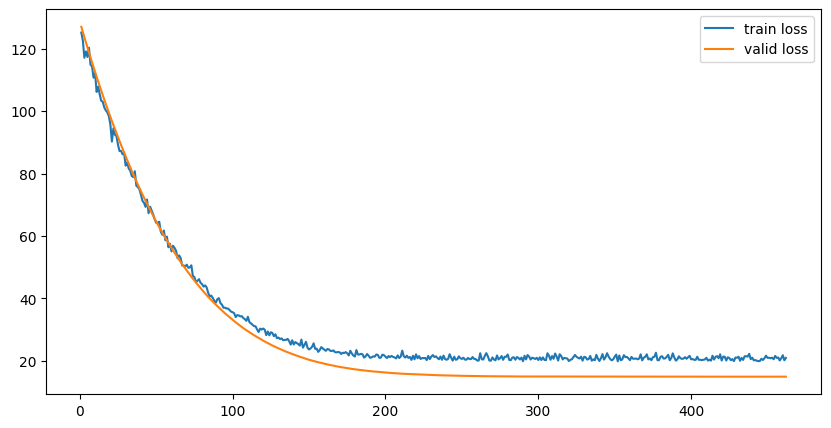

In [53]:
plt.figure(figsize=(10,5))
# 훈련용 손실
plt.plot(range(1,len(train_history)+1), # x축데이터 (epoch)
         train_history, # y축데이터 (loss)
         label='train loss')
# 검증용 손실
plt.plot(range(1,len(valid_history)+1), # x축데이터 (epoch)
         valid_history, # y축데이터 (loss)
         label='valid loss')
# 범례
plt.legend()
plt.show()

- 테스트 데이터로 모델 성능 평가

In [54]:
test_loss = 0 # 테스트 데이터 loss를 저장할 변수

with torch.no_grad() :
  X_test_batches = X_test.split(batch_size, dim=0)
  y_test_batches = y_test.split(batch_size, dim=0)

  for X,y in zip(X_test_batches,y_test_batches) :
    pred_test = model3(X) # 모델 예측
    loss = F.mse_loss(pred_test,y) # 손실값 계산

    test_loss += loss  # 손실값 누적

In [58]:
print(f"test loss : {test_loss / len(X_test_batches)} ")

test loss : 26.542272567749023 
